Лабораторная работа №3

Выполнила студентка группы 6131-010402D Фролова Анастасия Сергеевна

1:

In [14]:
import numpy as np
import pandas as pd

from pathlib import Path
from matplotlib import pyplot as plt

import sklearn as sk
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [ ]:
path = '...'

df = pd.read_csv(Path(path, 'Healthcare-Diabetes.csv'))

2:

Бинарная классификация:

Привести описание датасета.

Датасет содержит данные о состоянии здоровья, собранных для содействия разработке прогностических моделей для выявления лиц с риском диабета. Эти данные подходят для исследователей и специалистов, которые хотят внести свой вклад в текущие усилия по борьбе с диабетом с помощью идей и инноваций на основе данных, а также улучшению ранней диагностики и персонализированным стратегиям лечения диабет.
* Id - уникальный идентификатор;
* Pregnancies - количество беременностей;
* Glucose - концентрация глюкозы в плазме;
* BloodPressure - диастолическое артериальное давление (мм рт. ст.);
* SkinThickness - толщина трицепса (мм);
* Insulin - 2-часовой сывороточный инсулин (мкЕд/мл);
* BMI - индекс массы тела (вес в кг / рост в м^2);
* DiabetesPedigreeFunction - генетический показатель диабета;
* Age - возраст;
* Outcome - наличие диабета (0 - отсутствие, 1 - наличие).

Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".

In [16]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Закодировать категориальные признаки при необходимости.

In [17]:
# Все данные количественные, нет необходимости в кодировке, и нет пропусков

df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


Выбрать какое-нибудь значение гиперпараметра 
k
 алгоритма 
kNN.

Разбить выборку на обучающую и тестовую.

In [18]:
# Выбираем значение параметра k = 3

k = 3

# Выполним разбиение на обучающие и тестовые выборки

X = df.drop('Outcome', axis=1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, stratify=y)

Осуществить бинарную классификацию.

In [19]:
# Бинарная классификация

knn_model = KNeighborsClassifier(n_neighbors=k)
X_knn = knn_model.fit(x_train, y_train)
X_predict = knn_model.predict(x_test)

Посчитать метрики, а также составить classification_report.

In [20]:
# Считаем метрики

knn_acc = accuracy_score(y_test,X_predict)
knn_prec = precision_score(y_test, X_predict)
knn_rec = recall_score(y_test, X_predict)
knn_f1= f1_score(y_test, X_predict)
knn_class_report = classification_report(y_test, X_predict)

print(f"Accuracy = {knn_acc}; Precision = {knn_prec}; Recall = {knn_rec}; F1-score = {knn_f1}")
print(f"Classification Report:")
print(knn_class_report)

Accuracy = 0.6618531889290012; Precision = 0.5114155251141552; Recall = 0.3916083916083916; F1-score = 0.44356435643564357
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       545
           1       0.51      0.39      0.44       286

    accuracy                           0.66       831
   macro avg       0.61      0.60      0.60       831
weighted avg       0.65      0.66      0.65       831



Нормализовать данные (StandardScalerили MinMaxScaler).

In [21]:
#Выполним нормализацию

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(X, y, test_size= 0.3, random_state= 42, stratify=y)

knn_model_norm = KNeighborsClassifier(n_neighbors=k)
X_knn_norm = knn_model_norm.fit(x_train_norm, y_train_norm)
X_predict_norm = knn_model_norm.predict(x_test_norm)


print(f"Accuracy = {accuracy_score(y_test_norm,X_predict_norm)}; Precision = {precision_score(y_test_norm, X_predict_norm)}; Recall = {recall_score(y_test_norm, X_predict_norm)}; F1-score = {f1_score(y_test_norm, X_predict_norm)}")
print(f"Classification Report:")
print(classification_report(y_test_norm, X_predict_norm))

Accuracy = 0.7677496991576414; Precision = 0.691358024691358; Recall = 0.5874125874125874; F1-score = 0.6351606805293005
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       545
           1       0.69      0.59      0.64       286

    accuracy                           0.77       831
   macro avg       0.75      0.72      0.73       831
weighted avg       0.76      0.77      0.76       831



In [22]:
# Заметим, что после нормализации показатели метрик улучшились

Построить сorrelation heatmap и/или воспользоваться методом corr(). Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений.

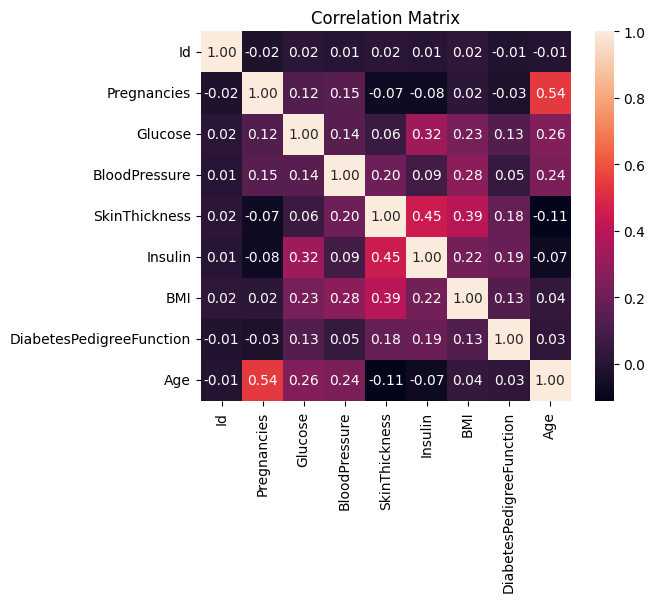

In [23]:
# Построим корреляционную матрицу

plt.title('Correlation Matrix')
sns.heatmap(data=X.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
plt.show()

In [24]:
# Выберем признаки

matrix_corr = X.corr()

# Обнуляем по диагонали

np.fill_diagonal(matrix_corr.values, 0)

#Задаем порог

t_corr = 0.5

fitered_matrix = matrix_corr.abs() > t_corr

# Группировка и сумма

feature_matrix = fitered_matrix.sum()

# Сортируем по убыванию

features_sort = feature_matrix.sort_values(ascending= False) # Сортируем по убыванию

# Задаем порог фильтрации

t_corr_1 = 0

filter_feat = features_sort[features_sort > t_corr_1].index.tolist() #Получение списка признаков, прошедших фильтрацию

print(f"Selected features:\n {filter_feat}")

Selected features:
 ['Pregnancies', 'Age']


Осуществить бинарную классификацию с отфильтрованными признаками.



Посчитать метрики, а также составить classification_report.

In [25]:
# Наиболее важными признаками оказались Pregnancies и Age, проведем с ними бинарную классификацию

x_train_ftr = x_train_norm[filter_feat]
x_test_ftr = x_test_norm[filter_feat]

knn_model_ftr = KNeighborsClassifier(n_neighbors = k, metric= "euclidean")
X_knn_ftr = knn_model_ftr.fit(x_train_ftr, y_train)
X_predict_ftr = knn_model_ftr.predict(x_test_ftr)

print(f"Accuracy = {accuracy_score(y_test_norm,X_predict_ftr)}; Precision = {precision_score(y_test_norm, X_predict_ftr)}; Recall = {recall_score(y_test_norm, X_predict_ftr)}; F1-score = {f1_score(y_test_norm, X_predict_ftr)}")
print(f"Classification Report:")
print(classification_report(y_test_norm, X_predict_ftr))

Accuracy = 0.7521058965102286; Precision = 0.6724137931034483; Recall = 0.5454545454545454; F1-score = 0.6023166023166023
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       545
           1       0.67      0.55      0.60       286

    accuracy                           0.75       831
   macro avg       0.73      0.70      0.71       831
weighted avg       0.74      0.75      0.75       831



Сравнить результаты "до" и "после" фильтрации, сделать выводы.



In [26]:
# Значения метрик ухудшились в сравнении с результатом до фильтрации
# Скорее всего были исключены признаки, несущие важную информацию о классе

train_score = []
test_score = []
crossval_score = []

for k in range(1, 16):
    clf = KNeighborsClassifier(n_neighbors = k)
    scores_ = cross_val_score(clf, X, y, cv = 10)
    print(f"Neighbors: {k}, folds count: 10 avg score: {scores_.mean()}")
    crossval_score.append(scores_.mean())
    clf.fit(x_train_ftr, y_train_norm)
    train_test = clf.predict(x_train_ftr)
    pred_test = clf.predict(x_test_ftr)

    train_score.append(accuracy_score(y_train_norm, train_test))
    test_score.append(accuracy_score(y_test_norm, pred_test))

Neighbors: 1, folds count: 10 avg score: 0.8081266677130747
Neighbors: 2, folds count: 10 avg score: 0.785740072202166
Neighbors: 3, folds count: 10 avg score: 0.8001883534766911
Neighbors: 4, folds count: 10 avg score: 0.7879061371841155
Neighbors: 5, folds count: 10 avg score: 0.7972989588238372
Neighbors: 6, folds count: 10 avg score: 0.7911565426672945
Neighbors: 7, folds count: 10 avg score: 0.7936849264898236
Neighbors: 8, folds count: 10 avg score: 0.7929681368701932
Neighbors: 9, folds count: 10 avg score: 0.7861050070632554
Neighbors: 10, folds count: 10 avg score: 0.7846675037932298
Neighbors: 11, folds count: 10 avg score: 0.7904567571809762
Neighbors: 12, folds count: 10 avg score: 0.7825079788625543
Neighbors: 13, folds count: 10 avg score: 0.78394548213258
Neighbors: 14, folds count: 10 avg score: 0.7781732328781458
Neighbors: 15, folds count: 10 avg score: 0.7785355517187255


Перебрать значения гиперпараметра k в каком-нибудь диапазоне с использованием кросс-валидации на данных с отфильтрованными признаками. Построить график train/test accuracy в зависимости от значения 
k
.

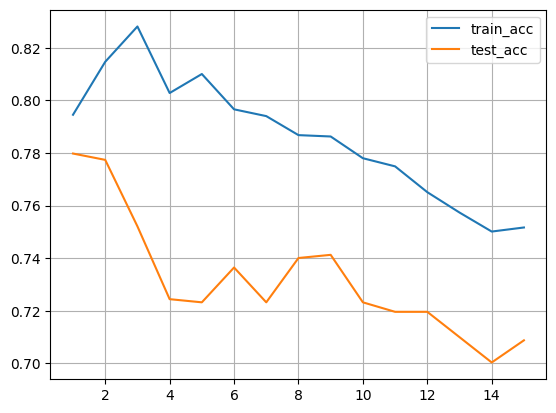

In [27]:
plt.plot(range(1, 16), train_score, label="train_acc")
plt.plot(range(1, 16), test_score, label="test_acc")
plt.legend()
plt.grid()

3:

Многоклассовая классификация:

Привести описание датасета.

In [28]:
df_2 = pd.read_csv(Path(path, 'star_classification.csv'))

Датасет содержит данные 100 000 наблюдений космоса, выполненных SDSS (Sloan Digital Sky Survey). Эти данные подходят для исследователей и специалистов в области астрономии и в нашем случае будет использоваться для классификации звезд, галактик и квазаров на основе их спектральных характеристик.
* obj_ID - уникальный идентификатор в каталоге изображений, используемом CAS;
* alpha - угол прямого восхождения;
* delta - угол склонения;
* u - ультрафиолетовый фильтр;
* g - зеленый фильтр;
* r - красный фильтр;
* i - фильтр ближнего инфракрасного диапазона;
* z - инфракрасный фильтр;
* run_ID - номер запуска для определения сканирования;
* rereun_ID - номер повтора, указывающий, как было обработано изображение;
* cam_col - столбец камеры для идентификации строки в ходе сканирования;
* field_ID - номер поля;
* spec_obj_ID - уникальный идентификатор, используемый для оптических спектроскопических объектов;
* class - класс объекта (галактика, звезда или квазар);
* redshift - значение красного смещения, основанное на увеличении длины волны;
* plate - идентификатор пластины в SDSS;
* MJD - модифицированная юлианская дата, используется для указания того, когда была получена данная часть данных SDSS;
* fiber_ID - идентификатор волокна, направлявшего свет на фокальную плоскость в каждом наблюдении.

Осуществить предобработку данных - "подчистить данные".

In [29]:
df_2.info()
df_2.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Закодировать категориальные признаки при необходимости.

In [30]:
df_2.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [31]:
# Выполним предобработку

df_2_drop = df_2.drop(columns = ['run_ID','rerun_ID','cam_col','field_ID'], axis = 1)
print(df_2_drop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   spec_obj_ID  100000 non-null  float64
 9   class        100000 non-null  object 
 10  redshift     100000 non-null  float64
 11  plate        100000 non-null  int64  
 12  MJD          100000 non-null  int64  
 13  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 10.7+ MB
None


In [32]:
print(df_2_drop['class'].unique())

['GALAXY' 'QSO' 'STAR']


In [ ]:
# Заменим значения категориальных признаков

columns = {'class': {'GALAXY': 0, 'QSO': 1, 'STAR': 2}}
df_2_drop = df_2_drop.replace(columns)
print(df_2_drop.info())

Нормализовать данные.

Разбить выборку на обучающую и тестовую.

In [34]:
X_2 = df_2_drop.drop('class', axis=1)
y_2 = df_2_drop['class']

scaler_2 = StandardScaler()
scaled_features_2 = scaler_2.fit_transform(X_2)
X_2 = pd.DataFrame(scaled_features_2, columns=X_2.columns)

k_2 = 5

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size= 0.3, random_state= 42, stratify=y_2)

Осуществить многоклассовую классификацию.

In [35]:
knn_model_2 = KNeighborsClassifier(n_neighbors=k_2)
X_knn_2 = knn_model_2.fit(x_train_2, y_train_2)
X_predict_2 = knn_model_2.predict(x_test_2)

print(f"Accuracy = {accuracy_score(y_test_2,X_predict_2)}; Precision = {precision_score(y_test_2, X_predict_2, average='micro')}; Recall = {recall_score(y_test_2, X_predict_2, average='micro')}; F1-score = {f1_score(y_test_2, X_predict_2, average='micro')}")
print(f"Classification Report:")
print(classification_report(y_test_2, X_predict_2))

Accuracy = 0.9178333333333333; Precision = 0.9178333333333333; Recall = 0.9178333333333333; F1-score = 0.9178333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.93     17834
           1       0.97      0.85      0.90      5688
           2       0.92      0.85      0.88      6478

    accuracy                           0.92     30000
   macro avg       0.93      0.89      0.91     30000
weighted avg       0.92      0.92      0.92     30000



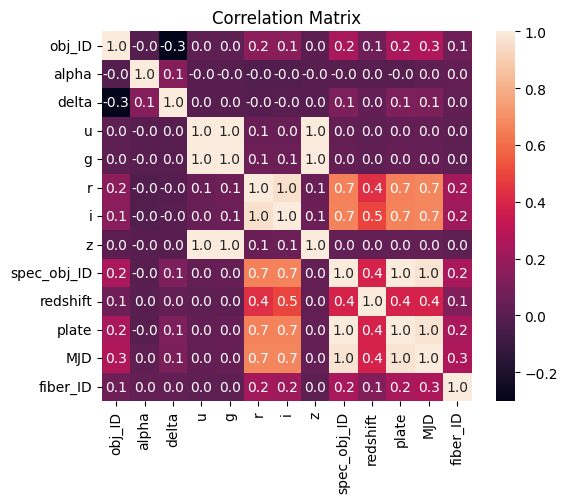

In [36]:
# Построим корреляционную матрицу

plt.title('Correlation Matrix')
sns.heatmap(data=X_2.corr(), square=True, annot=True, fmt='.1f', linecolor='white')
plt.show()

Осуществить многоклассовую классификацию с отфильтрованными признаками.

In [37]:
# Выберем признаки

matrix_corr_2 = X_2.corr()

# Обнуляем по диагонали

np.fill_diagonal(matrix_corr_2.values, 0)

fitered_matrix_2 = matrix_corr_2.abs() > t_corr

# Группировка и сумма

feature_matrix_2 = fitered_matrix_2.sum()

# Сортируем по убыванию

features_sort_2 = feature_matrix_2.sort_values(ascending= False) # Сортируем по убыванию

filter_feat_2 = features_sort_2[features_sort_2 > t_corr_1].index.tolist() #Получение списка признаков, прошедших фильтрацию

print(f"Selected features:\n {filter_feat_2}")

Selected features:
 ['r', 'i', 'spec_obj_ID', 'plate', 'MJD', 'u', 'g', 'z']


In [38]:
# Наиболее важными признаками оказались r, i, spec_obj_ID, plate, MJD, u, g, z проведем с ними  классификацию

x_train_ftr_2 = x_train_2[filter_feat_2]
x_test_ftr_2 = x_test_2[filter_feat_2]

knn_model_ftr_2 = KNeighborsClassifier(n_neighbors = k_2, metric= "euclidean")
X_knn_ftr_2 = knn_model_ftr_2.fit(x_train_ftr_2, y_train_2)
X_predict_ftr_2 = knn_model_ftr_2.predict(x_test_ftr_2)

print(f"Accuracy = {accuracy_score(y_test_2,X_predict_ftr_2)}; Precision = {precision_score(y_test_2, X_predict_ftr_2, average='micro')}; Recall = {recall_score(y_test_2, X_predict_ftr_2, average='micro')}; F1-score = {f1_score(y_test_2, X_predict_ftr_2, average='micro')}")
print(f"Classification Report:")
print(classification_report(y_test_2, X_predict_ftr_2))

Accuracy = 0.8349; Precision = 0.8349; Recall = 0.8349; F1-score = 0.8349
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     17834
           1       0.72      0.75      0.74      5688
           2       0.77      0.62      0.69      6478

    accuracy                           0.83     30000
   macro avg       0.79      0.77      0.78     30000
weighted avg       0.83      0.83      0.83     30000



In [39]:
# Некоторые метрики снизились, следовательно не стоит исключать признаки, если нам важен результат точности, а не производительность

Перебрать значения гиперпараметра 
k
 в каком-нибудь диапазоне с использованием кросс-валидации на данных с отфильтрованными признаками. Построить график train/test accuracy в зависимости от значения 
k
.

In [40]:
train_score_2 = []
test_score_2 = []
crossval_score_2 = []

for k in range(1, 16):
    clf_2 = KNeighborsClassifier(n_neighbors = k)
    scores_2 = cross_val_score(clf_2, X_2, y_2, cv = 10)
    print(f"Neighbors: {k}, folds count: 10 avg score: {scores_2.mean()}")
    crossval_score_2.append(scores_2.mean())
    clf_2.fit(x_train_ftr_2, y_train_2)
    train_test_2 = clf_2.predict(x_train_ftr_2)
    pred_test_2 = clf_2.predict(x_test_ftr_2)

    train_score_2.append(accuracy_score(y_train_2, train_test_2))
    test_score_2.append(accuracy_score(y_test_2, pred_test_2))

Neighbors: 1, folds count: 10 avg score: 0.90603
Neighbors: 2, folds count: 10 avg score: 0.8959299999999999
Neighbors: 3, folds count: 10 avg score: 0.9158799999999999
Neighbors: 4, folds count: 10 avg score: 0.90701
Neighbors: 5, folds count: 10 avg score: 0.91403
Neighbors: 6, folds count: 10 avg score: 0.9079
Neighbors: 7, folds count: 10 avg score: 0.91228
Neighbors: 8, folds count: 10 avg score: 0.9065100000000001
Neighbors: 9, folds count: 10 avg score: 0.9093399999999999
Neighbors: 10, folds count: 10 avg score: 0.9047799999999999
Neighbors: 11, folds count: 10 avg score: 0.9068800000000001
Neighbors: 12, folds count: 10 avg score: 0.9029399999999999
Neighbors: 13, folds count: 10 avg score: 0.9048999999999999
Neighbors: 14, folds count: 10 avg score: 0.9014899999999999
Neighbors: 15, folds count: 10 avg score: 0.9030099999999999


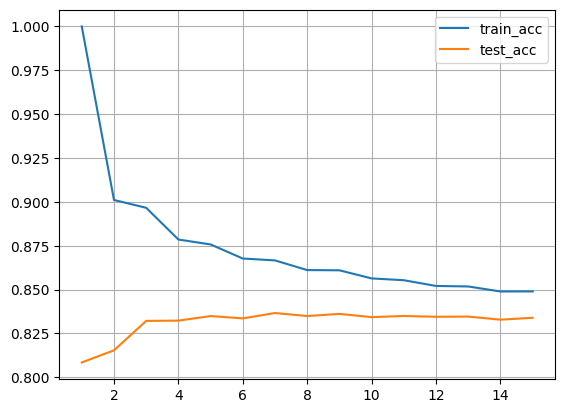

In [41]:
plt.plot(range(1, 16), train_score_2, label="train_acc")
plt.plot(range(1, 16), test_score_2, label="test_acc")
plt.legend()
plt.grid()

In [42]:
knn_model_best = KNeighborsClassifier(n_neighbors = 3)
X_knn_best = knn_model_best.fit(x_train_ftr_2, y_train_2)
X_predict_best = knn_model_best.predict(x_test_ftr_2)

print(f"Accuracy = {accuracy_score(y_test_2,X_predict_best)}; Precision = {precision_score(y_test_2, X_predict_best, average='micro')}; Recall = {recall_score(y_test_2, X_predict_best, average='micro')}; F1-score = {f1_score(y_test_2, X_predict_best, average='micro')}")
print(f"Classification Report:")
print(classification_report(y_test_2, X_predict_best))

Accuracy = 0.8321333333333333; Precision = 0.8321333333333333; Recall = 0.8321333333333333; F1-score = 0.8321333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     17834
           1       0.73      0.71      0.72      5688
           2       0.76      0.64      0.70      6478

    accuracy                           0.83     30000
   macro avg       0.79      0.76      0.78     30000
weighted avg       0.83      0.83      0.83     30000



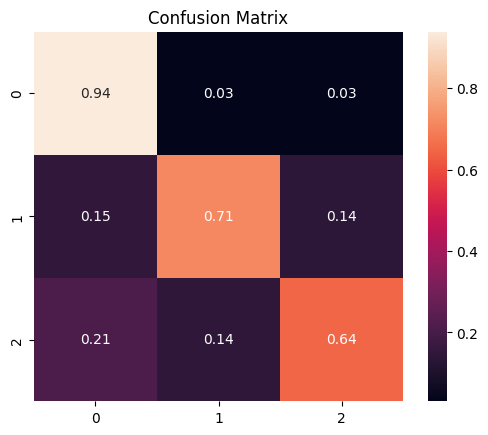

In [43]:
# Построим корреляционную матрицу

plt.title('Confusion Matrix')
sns.heatmap(data=confusion_matrix(y_test_2, X_predict_best, normalize='true'), square=True, annot=True, fmt='.2f', linecolor='white')
plt.show()